In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib.colors as colors
from urllib.request import urlopen
from tempfile import NamedTemporaryFile
import pathlib
import os

In [2]:
# Datos sacados de https://github.com/jorgeperezrojas/covid19-data/tree/master/csv/muertes_deis
path = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
grt = pd.read_csv(path, index_col=2)
grt

,CountryName,CountryCode,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
Date,,,,,,,,,,,,,,,,,,,,,
20200101,Aruba,ABW,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
20200102,Aruba,ABW,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
20200103,Aruba,ABW,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
20200104,Aruba,ABW,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
20200105,Aruba,ABW,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200706,Kosovo,RKS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42.59,NaN,50.71,NaN,45.51,NaN,42.42,NaN,62.5
20200707,Kosovo,RKS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42.59,NaN,50.71,NaN,45.51,NaN,42.42,NaN,62.5
20200708,Kosovo,RKS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42.59,NaN,50.71,NaN,45.51,NaN,42.42,NaN,62.5


In [3]:
grt.columns.values

array(['CountryName', 'CountryCode', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag',
       'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare',
       'H5_Investment in vaccines', 'M1_Wildcard', 'ConfirmedCases',
       'ConfirmedDeaths', 'StringencyIndex', 'StringencyIndexForDisplay',
       'StringencyLegacyIndex', 'StringencyLegacyIndexForDisplay',
       'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay',
       'ContainmentHealthIndex', 'ContainmentHealthInd

In [4]:
df = pd.DataFrame()
countries = ['Chile', 'Argentina', 'Bolivia', 'Brazil', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']
for country in countries:
    rename = grt.rename({'StringencyIndex': country}, axis=1)
    filtered = rename['CountryName'] == country
    df[country] = rename[filtered][country]
df = df.replace(0, np.nan)
df

,Chile,Argentina,Bolivia,Brazil,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela
Date,,,,,,,,,,
20200101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20200105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
20200706,NaN,92.59,NaN,NaN,NaN,NaN,75.93,NaN,40.74,NaN
20200707,NaN,92.59,NaN,NaN,NaN,NaN,75.93,NaN,40.74,NaN
20200708,NaN,92.59,NaN,NaN,NaN,NaN,75.93,NaN,40.74,NaN


In [5]:
def truncate_colormap(cmapIn='magma_r', minval=0.0, maxval=1.0, n=100):
    '''truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100)'''    
    cmapIn = plt.get_cmap(cmapIn)

    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),
        cmapIn(np.linspace(minval, maxval, n)))

    return new_cmap

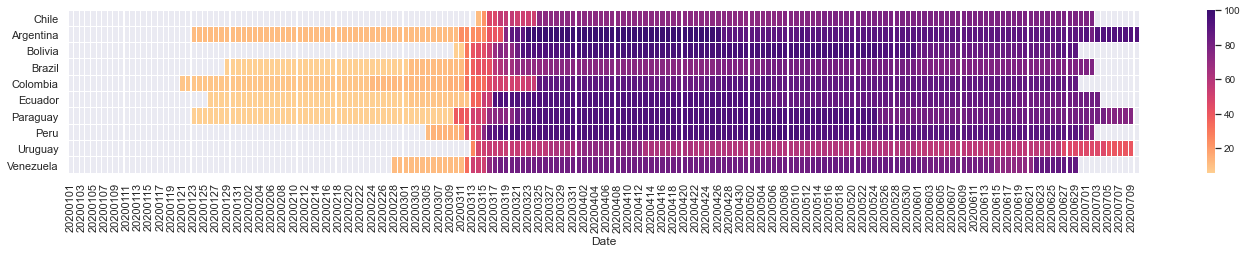

In [15]:
new_cmap = truncate_colormap('magma_r', 0.1, 0.8)

sns.set(font_scale=1)
# fig_path = os.path.join(path, "figuras/decesos_historicos")

# for comuna in comunas:
plt.figure(figsize=(24,3))
# filtered = deaths_data[deaths_data['comuna'] == comuna]
# data_comuna = filtered.drop(['comuna'], axis=1)

ax = sns.heatmap(df.T, linewidth=0.1, cmap=new_cmap)
# ax.grid(True, which="minor", color="w", linewidth=10.0)

# ax.set_xlabel(ax.get_xlabel(), fontproperties=roboto)
# ax.set_ylabel(ax.get_ylabel(), fontproperties=roboto)
# ax.set_title(comuna, fontproperties=roboto, fontsize=18, pad=15)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)


# plt.savefig(os.path.join(fig_path, comuna + '.png'), dpi=200)
plt.show()